In [ ]:
#https://github.com/aarshayj/Analytics_Vidhya/blob/master/Articles/Parameter_Tuning_GBM_with_Example/data_preparation.ipynb

In [ ]:
#https://www.analyticsvidhya.com/blog/2016/02/complete-guide-parameter-tuning-gradient-boosting-gbm-python/

In [1]:
import pandas as pd
import numpy as np
%matplotlib inline

In [4]:
#train = pd.read_csv('Train_nyOWmfK.csv')#,encoding='utf-8')
#test = pd.read_csv('Test_bCtAN1w.csv')#, encoding='utf-8')
test = pd.read_csv('Test_bCtAN1w.csv')#, encoding='utf-8')

test.head(2)

,ID,Gender,City,Monthly_Income,DOB,Lead_Creation_Date,Loan_Amount_Applied,Loan_Tenure_Applied,Existing_EMI,Employer_Name,...,Loan_Amount_Submitted,Loan_Tenure_Submitted,Interest_Rate,Processing_Fee,EMI_Loan_Submitted,Filled_Form,Device_Type,Var2,Source,Var4
0,ID000026A10,Male,Dehradun,21500,03-Apr-87,05-May-15,100000.0,3.0,0.0,APTARA INC,...,100000.0,3.0,20.0,1000.0,2649.39,N,Web-browser,B,S122,3
1,ID000054C40,Male,Mumbai,42000,12-May-80,01-May-15,0.0,0.0,0.0,ATUL LTD,...,690000.0,5.0,24.0,13800.0,19849.90,Y,Mobile,C,S133,5


In [5]:
#train = pd.read_csv('Train_nyOWmfK.csv')#,encoding='utf-8')
train = pd.read_csv('Train_my.csv')#,encoding='utf-8')

C:\Users\prassha\AppData\Local\Continuum\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:2705: DtypeWarning: Columns (12,18) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [7]:
train.shape, test.shape

((87020, 26), (37717, 24))

In [8]:
train['Disbursed'] = train.Disbursed.apply(lambda x: 0 if pd.isnull(x) else 1)
train.dtypes

ID                        object
Gender                    object
City                      object
Monthly_Income             int64
DOB                       object
Lead_Creation_Date        object
Loan_Amount_Applied      float64
Loan_Tenure_Applied      float64
Existing_EMI             float64
Employer_Name             object
Salary_Account            object
Mobile_Verified           object
Var5                      object
Var1                      object
Loan_Amount_Submitted    float64
Loan_Tenure_Submitted    float64
Interest_Rate            float64
Processing_Fee           float64
EMI_Loan_Submitted        object
Filled_Form               object
Device_Type               object
Var2                      object
Source                    object
Var4                       int64
LoggedIn                   int64
Disbursed                  int64
dtype: object

In [10]:
#train.Var5.value_counts()
train.Var5.value_counts(dropna=True)

0       17814
0       11272
1        7536
3        4966
1        4700
11       4003
2        2974
14       2479
15       2223
12       2208
13       1795
3        1793
2        1511
8        1459
10       1326
16       1324
4        1292
15       1286
11       1201
14       1183
9        1175
9        1106
10       1101
8        1056
7         981
17        936
13        827
12        781
16        773
17        755
6         685
5         639
4         523
7         508
5         336
6         298
18        194
HBXX        1
Name: Var5, dtype: int64

In [11]:
train.head(2)

,ID,Gender,City,Monthly_Income,DOB,Lead_Creation_Date,Loan_Amount_Applied,Loan_Tenure_Applied,Existing_EMI,Employer_Name,...,Interest_Rate,Processing_Fee,EMI_Loan_Submitted,Filled_Form,Device_Type,Var2,Source,Var4,LoggedIn,Disbursed
0,ID000002C20,Female,Delhi,20000,23-May-78,15-May-15,300000.0,5.0,0.0,CYBOSOL,...,NaN,NaN,NaN,N,Web-browser,G,S122,1,0,1
1,ID000004E40,Male,Mumbai,35000,7-Oct-85,4-May-15,200000.0,2.0,0.0,TATA CONSULTANCY SERVICES LTD (TCS),...,13.25,NaN,6762.9,N,Web-browser,G,S122,3,0,1


In [12]:
train['source'] = 'train'
test['source'] = 'test'
data =  pd.concat([train, test], ignore_index = True)
data.shape

(124737, 27)

In [7]:
##Check Missing
data.apply(lambda x: sum(x.isnull()))

City                      1401
DOB                          0
Device_Type                  0
Disbursed                37718
EMI_Loan_Submitted       84900
Employer_Name              113
Existing_EMI               111
Filled_Form                  0
Gender                       0
ID                           0
Interest_Rate            84901
Lead_Creation_Date           0
Loan_Amount_Applied        111
Loan_Amount_Submitted    49535
Loan_Tenure_Applied        111
Loan_Tenure_Submitted    49535
LoggedIn                 37717
Mobile_Verified              0
Monthly_Income               0
Processing_Fee           85346
Salary_Account           16801
Source                       0
Var1                         1
Var2                         0
Var4                         0
Var5                         0
source                       0
dtype: int64

In [14]:
##  Look at categories of all object variables:
var = ['Gender','Salary_Account','Mobile_Verified','Var1','Filled_Form','Device_Type','Var2','Source']
for v in var:
    print("\n\nFrequency count for variable:",v)
    print(data[v].value_counts(dropna=False))




Frequency count for variable: Gender
Male      71398
Female    53339
Name: Gender, dtype: int64


Frequency count for variable: Salary_Account
HDFC Bank                                          25180
ICICI Bank                                         19547
State Bank of India                                17110
NaN                                                16801
Axis Bank                                          12590
Citibank                                            3398
Kotak Bank                                          2955
IDBI Bank                                           2213
Punjab National Bank                                1747
Bank of India                                       1713
Bank of Baroda                                      1675
Standard Chartered Bank                             1434
Canara Bank                                         1384
Union Bank of India                                 1330
Yes Bank                                            1120


Handle Individual Variables:

In [ ]:
##city variable:
len(data.City.unique())    ## gives 724
data.drop('City',axis = 1, inplace=True )

In [10]:
## Determine Age from DOB
data.DOB.head()

0    23-May-78
1     7-Oct-85
2    10-Oct-81
3    30-Nov-87
4    17-Feb-84
Name: DOB, dtype: object

In [11]:
# create age variable
data['Age']  = data['DOB'].apply(lambda x : 117 - int(x[-2:]))
data.Age.head()

0    39
1    32
2    36
3    30
4    33
Name: Age, dtype: int64

In [12]:
#drop DOB
data.drop('DOB',axis = 1 , inplace = True)

KeyError: "['EMI_Loan_Submitted'] not in index"

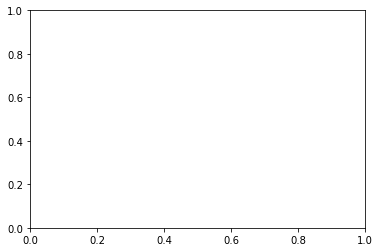

In [13]:
data.boxplot(column=['EMI_Loan_Submitted'], return_type = 'axes')

In [14]:
#Majority values missing so I'll create a new variable stating whether this is missing or note:
data['EMI_Loan_Submitted_Missing'] = data['EMI_Loan_Submitted'].apply(lambda x: 1 if pd.isnull(x) else 0)
data[['EMI_Loan_Submitted','EMI_Loan_Submitted_Missing']].head(10)

,EMI_Loan_Submitted,EMI_Loan_Submitted_Missing
0,NaN,1
1,6762.9,0
2,NaN,1
3,NaN,1
4,NaN,1
5,6978.92,0
6,NaN,1
7,NaN,1
8,30824.7,0
9,10883.4,0


In [15]:
#drop original vaiables:
data.drop('EMI_Loan_Submitted', axis = 1 , inplace = True)

In [16]:
len(data['Employer_Name'].value_counts())

57193

In [17]:
#I'll drop the variable because too many unique values. Another option could be to categorize them manually
data.drop('Employer_Name',axis=1,inplace=True)

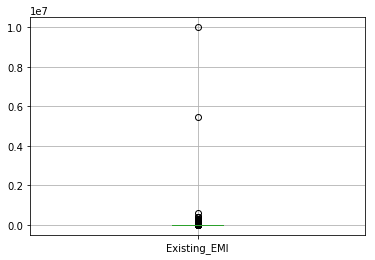

In [15]:
data.boxplot(column='Existing_EMI',return_type='axes')

In [18]:
data['Existing_EMI'].describe()

count    1.246260e+05
mean     3.636342e+03
std      3.369124e+04
min      0.000000e+00
25%      0.000000e+00
50%      0.000000e+00
75%      3.500000e+03
max      1.000000e+07
Name: Existing_EMI, dtype: float64

In [19]:
data['Existing_EMI'].median()

0.0

In [20]:
#Impute by median (0) because just 111 missing:
data['Existing_EMI'].fillna(0,inplace = True)

In [21]:
## Interest Rate:
#Majority values missing so I'll create a new variable stating whether this is missing or note:
data['Interest_Rate_Missing']  = data['Interest_Rate'].apply(lambda x: 1 if pd.isnull(x) else 0)
print(data[['Interest_Rate','Interest_Rate_Missing']].head(10))

   Interest_Rate  Interest_Rate_Missing
0            NaN                      1
1          13.25                      0
2            NaN                      1
3            NaN                      1
4            NaN                      1
5          13.99                      0
6            NaN                      1
7            NaN                      1
8          14.85                      0
9          18.25                      0


In [22]:
data.drop('Interest_Rate', axis=1, inplace=True)

In [23]:
## Lead Creation Date:¶
#Drop this variable because doesn't appear to affect much intuitively
data.drop('Lead_Creation_Date',axis=1,inplace=True)

Loan Amount and Tenure applied:

In [24]:
#Impute with median because only 111 missing:
data['Loan_Amount_Applied'].fillna(data['Loan_Amount_Applied'].median(),inplace = True)
data['Loan_Tenure_Applied'].fillna(data['Loan_Tenure_Applied'].median(),inplace=True)

In [25]:
## Loan Amount and Tenure selected
#High proportion missing so create a new var whether present or not
data['Loan_Amount_Submitted_Missing'] = data['Loan_Amount_Submitted'].apply(lambda x: 1 if pd.isnull(x) else 0)
data['Loan_Tenure_Submitted_Missing'] = data['Loan_Tenure_Submitted'].apply(lambda x: 1 if pd.isnull(x) else 0)

In [26]:
#Remove old vars
data.drop(['Loan_Amount_Submitted','Loan_Tenure_Submitted'],axis=1,inplace=True)

In [27]:
## Remove logged-in
data.drop('LoggedIn',axis=1,inplace=True)

In [28]:
## Remove salary account
#Salary account has mnay banks which have to be manually grouped
data.drop('Salary_Account',axis=1,inplace=True)

In [29]:
## Processing_Fee
#High proportion missing so create a new var whether present or not
data['Processing_Fee_Missing'] = data['Processing_Fee'].apply(lambda x: 1 if pd.isnull(x) else 0)
#drop old
data.drop('Processing_Fee',axis=1,inplace=True)

In [17]:
## Source
data['Source']  = data['Source'].apply(lambda x: 'others' if x not in ['S122', 'S133'] else x)
data['Source'].value_counts(dropna=False)

S122      55248
S133      42900
others    26589
Name: Source, dtype: int64

In [31]:
## Final Data:
data.apply(lambda x: sum(x.isnull()))

City                              1401
Device_Type                          0
Disbursed                        37718
Existing_EMI                         0
Filled_Form                          0
Gender                               0
ID                                   0
Loan_Amount_Applied                  0
Loan_Tenure_Applied                  0
Mobile_Verified                      0
Monthly_Income                       0
Source                               0
Var1                                 1
Var2                                 0
Var4                                 0
Var5                                 0
source                               0
Age                                  0
EMI_Loan_Submitted_Missing           0
Interest_Rate_Missing                0
Loan_Amount_Submitted_Missing        0
Loan_Tenure_Submitted_Missing        0
Processing_Fee_Missing               0
dtype: int64

In [33]:
data.Var1.value_counts()

HBXX    84900
HBXC    12952
HBXB     6502
HAXA     4214
HBXA     3042
HAXB     2879
HBXD     2818
HAXC     2171
HBXH     1387
HCXF      990
HAYT      710
HAVC      570
HAXM      386
HCXD      348
HCYS      318
HVYS      252
HAZD      161
HCXG      114
HAXF       22
Name: Var1, dtype: int64

In [34]:
data['Var1'] = data['Var1'].apply(lambda x : 'HBXX' if pd.isnull(x) else x)

In [35]:
data.Var1.value_counts()

HBXX    84901
HBXC    12952
HBXB     6502
HAXA     4214
HBXA     3042
HAXB     2879
HBXD     2818
HAXC     2171
HBXH     1387
HCXF      990
HAYT      710
HAVC      570
HAXM      386
HCXD      348
HCYS      318
HVYS      252
HAZD      161
HCXG      114
HAXF       22
Name: Var1, dtype: int64

In [36]:
## Final Data:
data.apply(lambda x: sum(x.isnull()))

City                              1401
Device_Type                          0
Disbursed                        37718
Existing_EMI                         0
Filled_Form                          0
Gender                               0
ID                                   0
Loan_Amount_Applied                  0
Loan_Tenure_Applied                  0
Mobile_Verified                      0
Monthly_Income                       0
Source                               0
Var1                                 0
Var2                                 0
Var4                                 0
Var5                                 0
source                               0
Age                                  0
EMI_Loan_Submitted_Missing           0
Interest_Rate_Missing                0
Loan_Amount_Submitted_Missing        0
Loan_Tenure_Submitted_Missing        0
Processing_Fee_Missing               0
dtype: int64

In [37]:
data.dtypes

City                              object
Device_Type                        int64
Disbursed                        float64
Existing_EMI                     float64
Filled_Form                        int64
Gender                             int64
ID                                object
Loan_Amount_Applied              float64
Loan_Tenure_Applied              float64
Mobile_Verified                    int64
Monthly_Income                     int64
Source                             int64
Var1                              object
Var2                              object
Var4                               int64
Var5                              object
source                            object
Age                                int64
EMI_Loan_Submitted_Missing         int64
Interest_Rate_Missing              int64
Loan_Amount_Submitted_Missing      int64
Loan_Tenure_Submitted_Missing      int64
Processing_Fee_Missing             int64
dtype: object

In [38]:
data['Var5'].value_counts()

0       30311
1       12862
0       11272
3        7800
11       6226
1        4700
14       4044
15       3737
2        3558
12       3509
2        2974
13       2922
8        2573
16       2323
10       2166
4        2116
9        2115
3        1793
17       1621
7        1607
10       1326
15       1286
11       1201
14       1183
9        1175
6        1108
5        1092
8        1056
13        827
12        781
16        773
17        755
4         523
7         508
5         336
6         298
18        279
HBXX        1
Name: Var5, dtype: int64

In [39]:
##Numerical Coding:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
var_to_encode = ['Device_Type','Filled_Form','Gender','Mobile_Verified','Source','Var1','Var2']
for col in var_to_encode:
    data[col] = le.fit_transform(data[col])


In [40]:
data['Gender'].value_counts()

1    71398
0    53339
Name: Gender, dtype: int64

In [ ]:
##data['Var5'] = data['Var5'].apply(lambda x : 0 if pd.isnull(x) else x)
#data['']

In [41]:
## One-Hot Coding
data = pd.get_dummies(data, columns = var_to_encode)
data.columns

Index(['City', 'Disbursed', 'Existing_EMI', 'ID', 'Loan_Amount_Applied',
       'Loan_Tenure_Applied', 'Monthly_Income', 'Var4', 'Var5', 'source',
       'Age', 'EMI_Loan_Submitted_Missing', 'Interest_Rate_Missing',
       'Loan_Amount_Submitted_Missing', 'Loan_Tenure_Submitted_Missing',
       'Processing_Fee_Missing', 'Device_Type_0', 'Device_Type_1',
       'Device_Type_2', 'Filled_Form_0', 'Filled_Form_1', 'Filled_Form_2',
       'Gender_0', 'Gender_1', 'Mobile_Verified_0', 'Mobile_Verified_1',
       'Mobile_Verified_2', 'Source_0', 'Source_1', 'Source_2', 'Var1_0',
       'Var1_1', 'Var1_2', 'Var1_3', 'Var1_4', 'Var1_5', 'Var1_6', 'Var1_7',
       'Var1_8', 'Var1_9', 'Var1_10', 'Var1_11', 'Var1_12', 'Var1_13',
       'Var1_14', 'Var1_15', 'Var1_16', 'Var1_17', 'Var1_18', 'Var2_0',
       'Var2_1', 'Var2_2', 'Var2_3', 'Var2_4', 'Var2_5', 'Var2_6', 'Var2_7'],
      dtype='object')

In [42]:
## Separate train & test:
train = data.loc[data['source']=='train']
test = data.loc[data['source']== 'test']

In [43]:
train.drop('source', axis = 1, inplace = True)
test.drop(['source','Disbursed'], axis = 1 , inplace = True)

C:\Users\prassha\AppData\Local\Continuum\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
C:\Users\prassha\AppData\Local\Continuum\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [44]:
train.to_csv('train_modified.csv',index=False)
test.to_csv('test_modified.csv', index=False)